## Loading 2D fields into yt 

`yt_xarray` can also load in 2D fields from xarray into a yt dataset. To do so, all you have to do is provide a selection dictionary that will reduce your chosen field down to 2D. 

First, let's import and create a test dataset with dimensions that yt will not know:

In [1]:
import xarray as xr
import yt_xarray
import yt
import numpy as np
from yt_xarray.sample_data import load_random_xr_data

fields = {'temp': ('x', 'y', 'z'), 
          'precip': ('x', 'y'),
          'precip_t': ('x', 'y', 'time')}
dims = {'x': (0,1,15), 'y': (0, 1, 10), 'z': (0, 1, 15), 'time': (0, 1, 5)}
ds = load_random_xr_data(fields, dims, length_unit='m')
ds

<xarray.Dataset>
Dimensions:   (x: 15, y: 10, z: 15, time: 5)
Coordinates:
  * x         (x) float64 0.0 0.07143 0.1429 0.2143 ... 0.7857 0.8571 0.9286 1.0
  * y         (y) float64 0.0 0.1111 0.2222 0.3333 ... 0.6667 0.7778 0.8889 1.0
  * z         (z) float64 0.0 0.07143 0.1429 0.2143 ... 0.7857 0.8571 0.9286 1.0
  * time      (time) float64 0.0 0.25 0.5 0.75 1.0
Data variables:
    temp      (x, y, z) float64 0.007407 0.9874 0.1214 ... 0.4481 0.2352 0.8758
    precip    (x, y) float64 0.9047 0.6226 0.8323 ... 0.4109 0.7899 0.9992
    precip_t  (x, y, time) float64 0.1815 0.8909 0.4908 ... 0.7398 0.3044 0.7671
Attributes:
    geospatial_vertical_units:  m

loading the `"temp"` field without any selection dictionary will load the full 3D field: 

In [2]:
yt_ds = ds.yt.load_grid(fields=["temp",], length_unit = 'km')

yt_xarray : [INFO ] 2023-01-20 15:53:09,333:  Inferred geometry type is cartesian. To override, use ds.yt.set_geometry
yt : [INFO     ] 2023-01-20 15:53:09,403 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-01-20 15:53:09,404 Parameters: domain_dimensions         = [15 10 15]
yt : [INFO     ] 2023-01-20 15:53:09,405 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-20 15:53:09,406 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-20 15:53:09,406 Parameters: cosmological_simulation   = 0


In [3]:
print(yt_ds.domain_width)

[1. 1. 1.] code_length


loading in the `"precip"` field, which is two dimensional, which load in the field with a dummy 3rd dimension:

In [4]:
yt_ds = ds.yt.load_grid(fields=["precip",], length_unit = 'km')

yt : [INFO     ] 2023-01-20 15:53:09,461 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-01-20 15:53:09,462 Parameters: domain_dimensions         = [15 10  1]
yt : [INFO     ] 2023-01-20 15:53:09,462 Parameters: domain_left_edge          = [ 0.   0.  -0.5]
yt : [INFO     ] 2023-01-20 15:53:09,463 Parameters: domain_right_edge         = [1.  1.  0.5]
yt : [INFO     ] 2023-01-20 15:53:09,464 Parameters: cosmological_simulation   = 0


In [5]:
print(yt_ds.domain_width)

[1. 1. 1.] code_length


yt : [INFO     ] 2023-01-20 15:53:09,589 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-01-20 15:53:09,590 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-01-20 15:53:09,590 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-01-20 15:53:09,591 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-01-20 15:53:09,595 Making a fixed resolution buffer of (('stream', 'precip')) 800 by 800



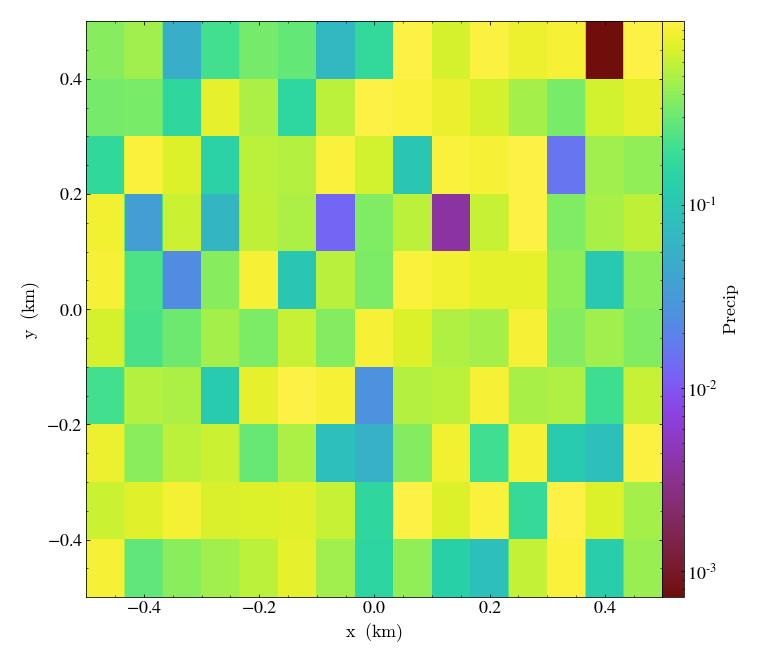

In [6]:
yt.SlicePlot(yt_ds, "z", ("stream", "precip"))

Finally, you can also provide a selection dictionary to reduce a field to 2D. For example, you can load select a timestep to load for `"precip_t"` with:

In [7]:
yt_ds = ds.yt.load_grid(fields=["precip_t",], length_unit = 'km', geometry="cartesian", sel_dict={'time':0})

yt : [INFO     ] 2023-01-20 15:53:10,216 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-01-20 15:53:10,217 Parameters: domain_dimensions         = [15 10  1]
yt : [INFO     ] 2023-01-20 15:53:10,218 Parameters: domain_left_edge          = [ 0.   0.  -0.5]
yt : [INFO     ] 2023-01-20 15:53:10,219 Parameters: domain_right_edge         = [1.  1.  0.5]
yt : [INFO     ] 2023-01-20 15:53:10,220 Parameters: cosmological_simulation   = 0


In [8]:
print(yt_ds.domain_width)

[1. 1. 1.] code_length


yt : [INFO     ] 2023-01-20 15:53:10,319 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-01-20 15:53:10,319 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-01-20 15:53:10,320 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-01-20 15:53:10,320 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-01-20 15:53:10,324 Making a fixed resolution buffer of (('stream', 'precip_t')) 800 by 800



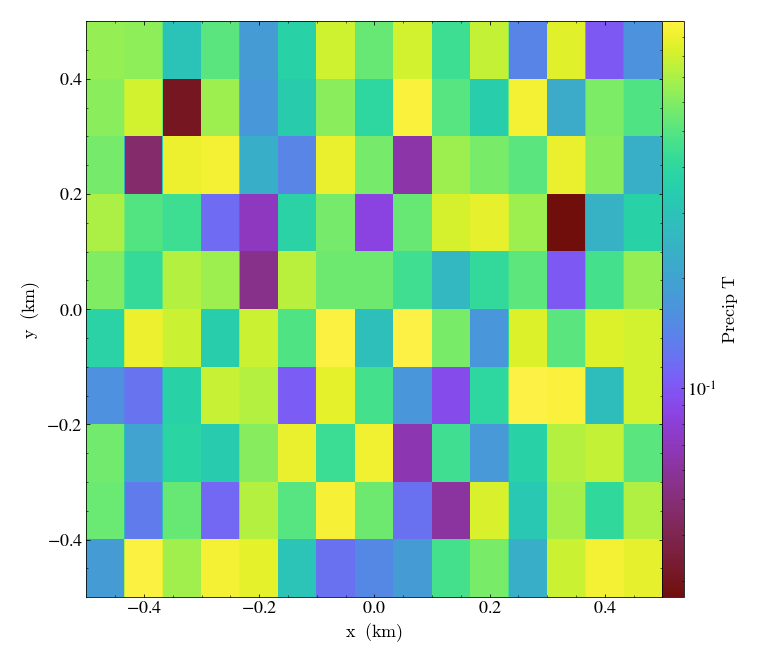

In [9]:
yt.SlicePlot(yt_ds, "z", ("stream", "precip_t"))